# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
#Generate Cities List

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
city_data = []

print('Beginning Data Retrieval\n-----------------------------\n')

rcd = 0 
sets = 1
for city in cities:
    
    rcd += 1
    print(f'Processing Record {rcd} of Set {sets} | {city}')
    
    if rcd == 50:
        rcd = 0
        sets += 1
    
    query_url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&clouds.value&units=imperial&appid={weather_api_key}"
    weather = requests.get(query_url).json()

    try:
        city_data.append({
            'City': city,
            'Lat': weather['coord']['lat'],
            'Lng': weather["coord"]['lon'],
            'Temp': weather["main"]["temp_max"],
            'Humidity': weather["main"]["humidity"],
            'Cloudiness': weather["clouds"]["all"],
            'Wind': weather["wind"]["speed"],
            'Country': weather["sys"]["country"],
            'Date': weather["dt"]
        })
    except:
        print('City not found. Skipping...')
        pass

print('-----------------------------\nData Retrieval Complete\n-----------------------------')

Beginning Data Retrieval
-----------------------------

Processing Record 1 of Set 1 | san roque
Processing Record 2 of Set 1 | bengkulu
Processing Record 3 of Set 1 | kozhva
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | saint-philippe
Processing Record 6 of Set 1 | juneau
Processing Record 7 of Set 1 | khatanga
Processing Record 8 of Set 1 | provideniya
Processing Record 9 of Set 1 | barrow
Processing Record 10 of Set 1 | port alfred
Processing Record 11 of Set 1 | plyussa
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | kapaa
Processing Record 14 of Set 1 | santa maria
Processing Record 15 of Set 1 | natal
Processing Record 16 of Set 1 | chokurdakh
Processing Record 17 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 18 of Set 1 | bluff
Processing Record 19 of Set 1 | hobart
Processing Record 20 of Set 1 | thompson
Processing Record 21 of Set 1 | punta arenas
Processing Record 22 of Set 1 | madras
Processing Record 23 o

City not found. Skipping...
Processing Record 38 of Set 4 | lagoa
Processing Record 39 of Set 4 | wulanhaote
City not found. Skipping...
Processing Record 40 of Set 4 | khash
Processing Record 41 of Set 4 | riyadh
Processing Record 42 of Set 4 | alekseyevsk
Processing Record 43 of Set 4 | shahrud
Processing Record 44 of Set 4 | aljezur
Processing Record 45 of Set 4 | hofn
Processing Record 46 of Set 4 | marawi
Processing Record 47 of Set 4 | harper
Processing Record 48 of Set 4 | sur
Processing Record 49 of Set 4 | sao filipe
Processing Record 50 of Set 4 | carmelo
Processing Record 1 of Set 5 | cayenne
Processing Record 2 of Set 5 | faanui
Processing Record 3 of Set 5 | pangnirtung
Processing Record 4 of Set 5 | metro
Processing Record 5 of Set 5 | skjervoy
Processing Record 6 of Set 5 | juegang
Processing Record 7 of Set 5 | labuhan
Processing Record 8 of Set 5 | iqaluit
Processing Record 9 of Set 5 | cidreira
Processing Record 10 of Set 5 | aquin
Processing Record 11 of Set 5 | paci

Processing Record 27 of Set 8 | college
Processing Record 28 of Set 8 | vao
Processing Record 29 of Set 8 | meulaboh
Processing Record 30 of Set 8 | nanortalik
Processing Record 31 of Set 8 | kaoma
Processing Record 32 of Set 8 | gravdal
Processing Record 33 of Set 8 | loveland
Processing Record 34 of Set 8 | tuatapere
Processing Record 35 of Set 8 | winnemucca
Processing Record 36 of Set 8 | dongsheng
Processing Record 37 of Set 8 | mixtequilla
City not found. Skipping...
Processing Record 38 of Set 8 | santa isabel do rio negro
Processing Record 39 of Set 8 | anadyr
Processing Record 40 of Set 8 | payakumbuh
Processing Record 41 of Set 8 | marrakesh
Processing Record 42 of Set 8 | buritis
Processing Record 43 of Set 8 | amarante do maranhao
Processing Record 44 of Set 8 | rockhampton
Processing Record 45 of Set 8 | new plymouth
Processing Record 46 of Set 8 | san jeronimo
Processing Record 47 of Set 8 | shetpe
Processing Record 48 of Set 8 | kalmunai
Processing Record 49 of Set 8 | k

Processing Record 15 of Set 12 | marzuq
Processing Record 16 of Set 12 | simbahan
Processing Record 17 of Set 12 | kemise
Processing Record 18 of Set 12 | gerash
Processing Record 19 of Set 12 | ribeira grande
Processing Record 20 of Set 12 | koumac
Processing Record 21 of Set 12 | kamenka
Processing Record 22 of Set 12 | itacare
Processing Record 23 of Set 12 | trinidad
Processing Record 24 of Set 12 | erzin
Processing Record 25 of Set 12 | westport
Processing Record 26 of Set 12 | san andres
Processing Record 27 of Set 12 | athabasca
Processing Record 28 of Set 12 | chirongui
Processing Record 29 of Set 12 | sivas
Processing Record 30 of Set 12 | chinsali
Processing Record 31 of Set 12 | poum
Processing Record 32 of Set 12 | shonguy
Processing Record 33 of Set 12 | phuket
Processing Record 34 of Set 12 | mitchell
Processing Record 35 of Set 12 | mokhsogollokh
Processing Record 36 of Set 12 | panguna
Processing Record 37 of Set 12 | nagato
Processing Record 38 of Set 12 | republic
Pro

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
df = pd.DataFrame(city_data)
df.to_csv(output_data_file)
df

City      Lat       Lng   Temp  Humidity  Cloudiness   Wind  \
0         san roque  36.2107   -5.3842  59.00        67          75  13.80   
1          bengkulu  -3.8004  102.2655  76.48        85          72   4.85   
2            kozhva  65.1073   57.0459  -8.05        91          99   8.21   
3           rikitea -23.1203 -134.9692  78.80        69           0  10.65   
4    saint-philippe -21.3585   55.7679  80.60        65           0   5.75   
..              ...      ...       ...    ...       ...         ...    ...   
576       morondava -20.2833   44.2833  82.87        82         100  10.38   
577    port augusta -32.5000  137.7667  64.40        77          90   6.91   
578       la crosse  43.8014  -91.2396  12.00        61          75  24.16   
579           dosso  13.0490    3.1937  82.45        15           0   8.77   
580       boa vista   2.8197  -60.6733  87.80        51          90  14.97   

    Country        Date  
0        ES  1612551867  
1        ID  1612551690  
2        RU  1612551867  
3        PF  1612551794  
4        RE  1612551683  
..      ...         ...  
576      MG  1612551684  
577      AU  1612551938  
578      US  1612551938  
579      NE  1612551938  
580      BR  1612551938  

[581 rows x 9 columns]

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
df.describe()

Lat         Lng        Temp    Humidity  Cloudiness        Wind  \
count  581.000000  581.000000  581.000000  581.000000  581.000000  581.000000   
mean    19.641678   15.154949   52.180052   71.111876   51.117040    8.095680   
std     32.514682   91.006945   31.796695   21.340738   40.661471    5.337366   
min    -54.800000 -179.166700  -41.550000   12.000000    0.000000    0.380000   
25%     -6.884400  -64.798100   35.010000   60.000000    1.000000    3.960000   
50%     22.678300   21.286900   62.010000   77.000000   59.000000    6.910000   
75%     45.523400  100.335400   77.000000   87.000000   90.000000   11.450000   
max     78.218600  179.316700  102.990000  100.000000  100.000000   28.770000   

               Date  
count  5.810000e+02  
mean   1.612552e+09  
std    9.409210e+01  
min    1.612552e+09  
25%    1.612552e+09  
50%    1.612552e+09  
75%    1.612552e+09  
max    1.612552e+09

In [9]:
#  Get the indices of cities that have humidity over 100%.


In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

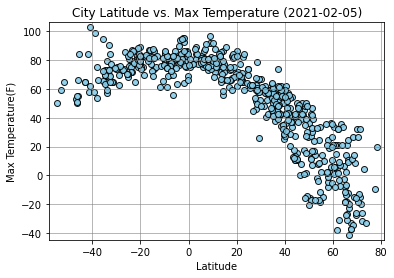

In [30]:
plt.scatter(df["Lat"], df["Temp"], marker="o", facecolors="skyblue", edgecolors="black", alpha=0.90)

curr_date = pd.to_datetime('today').date()

plt.xlim(df["Lat"].min()-3, df["Lat"].max()+3)
plt.ylim(df["Temp"].min()-3, df["Temp"].max()+3)

plt.title(f"City Latitude vs. Max Temperature ({curr_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")

plt.grid(b=True, which='major', color='grey', linestyle='-', alpha=0.70)
plt.savefig('output_data/lat_v_temp.png')

## Latitude vs. Humidity Plot

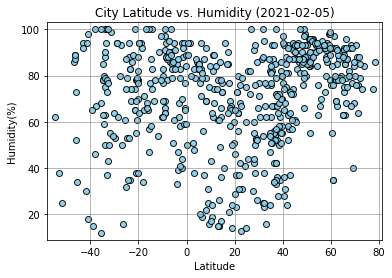

In [31]:
plt.scatter(df["Lat"], df["Humidity"], marker="o", facecolors="skyblue", edgecolors="black", alpha=0.90)

plt.xlim(df["Lat"].min()-3, df["Lat"].max()+3)
plt.ylim(df["Humidity"].min()-3, df["Humidity"].max()+3)

plt.title(f"City Latitude vs. Humidity ({curr_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")

plt.grid(b=True, which='major', color='grey', linestyle='-', alpha=0.70)
plt.savefig('output_data/lat_v_hum.png')

## Latitude vs. Cloudiness Plot

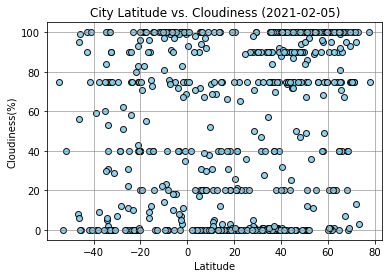

In [32]:
plt.scatter(df["Lat"], df["Cloudiness"], marker="o", facecolors="skyblue", edgecolors="black", alpha=0.90)

plt.xlim(df["Lat"].min()-5, df["Lat"].max()+5)
plt.ylim(df["Cloudiness"].min()-5, df["Cloudiness"].max()+5)

plt.title(f"City Latitude vs. Cloudiness ({curr_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")

plt.grid(b=True, which='major', color='grey', linestyle='-', alpha=0.70)
plt.savefig('output_data/lat_v_cloud.png')

## Latitude vs. Wind Speed Plot

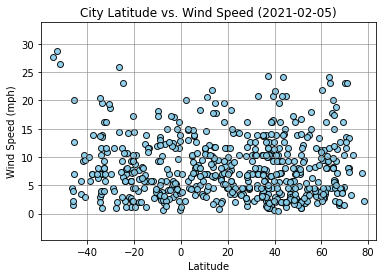

In [33]:
plt.scatter(df["Lat"], df["Wind"], marker="o", facecolors="skyblue", edgecolors="black", alpha=0.90)

plt.xlim(df["Lat"].min()-5, df["Lat"].max()+5)
plt.ylim(df["Wind"].min()-5, df["Wind"].max()+5)

plt.title(f"City Latitude vs. Wind Speed ({curr_date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.grid(b=True, which='major', color='grey', linestyle='-', alpha=0.70)
plt.savefig('output_data/lat_v_wind.png')

## Linear Regression

In [34]:
north_hem_df = df.loc[df["Lat"] >=0]
south_hem_df = df.loc[df["Lat"] <0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

the r-value is: 0.7822226566604631


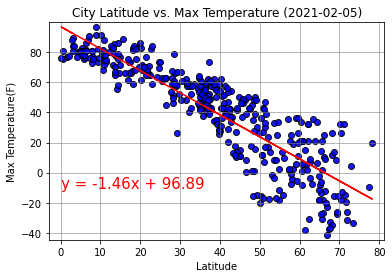

In [35]:
x_values = north_hem_df["Lat"]
y_values = north_hem_df["Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black", alpha=0.90)

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(0,-10), fontsize=15,color="red")

plt.xlim(x_values.min()-3, x_values.max()+3)
plt.ylim(y_values.min()-3, y_values.max()+3)

plt.title(f"City Latitude vs. Max Temperature ({curr_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")

plt.grid(b=True, which='major', color='grey', linestyle='-', alpha=0.70)

plt.savefig('output_data/lat_v_temp_N.png')

print(f'the r-value is: {rvalue**2}')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

the r-value is: 0.22951108754486488


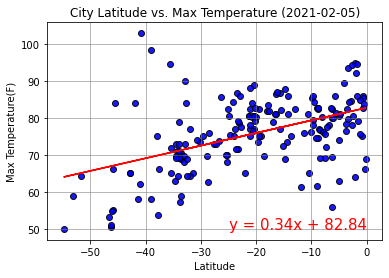

In [36]:
x_values = south_hem_df["Lat"]
y_values = south_hem_df["Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black", alpha=0.90)

plt.plot(x_values,regress_values,"r")

plt.annotate(line_eq,(-25,50),fontsize=15,color="red")

plt.xlim(x_values.min()-3, x_values.max()+3)
plt.ylim(y_values.min()-3, y_values.max()+3)

plt.title(f"City Latitude vs. Max Temperature ({curr_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")

plt.grid(b=True, which='major', color='grey', linestyle='-', alpha=0.70)

plt.savefig('output_data/lat_v_temp_S.png')

print(f'the r-value is: {rvalue**2}')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

the r-value is: 0.14244196044140042


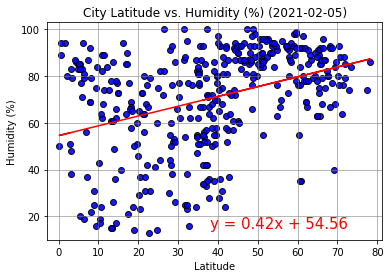

In [37]:
x_values = north_hem_df["Lat"]
y_values = north_hem_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black", alpha=0.90)

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(38,15), fontsize=15,color="red")

plt.xlim(x_values.min()-3, x_values.max()+3)
plt.ylim(y_values.min()-3, y_values.max()+3)

plt.title(f"City Latitude vs. Humidity (%) ({curr_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.grid(b=True, which='major', color='grey', linestyle='-', alpha=0.70)

plt.savefig('output_data/lat_v_hum_N.png')

print(f'the r-value is: {rvalue**2}')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

the r-value is: 0.020319345217105076


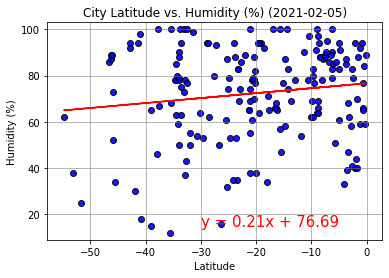

In [38]:
x_values = south_hem_df["Lat"]
y_values = south_hem_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black", alpha=0.90)

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(-30,15), fontsize=15,color="red")

plt.xlim(x_values.min()-3, x_values.max()+3)
plt.ylim(y_values.min()-3, y_values.max()+3)

plt.title(f"City Latitude vs. Humidity (%) ({curr_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.grid(b=True, which='major', color='grey', linestyle='-', alpha=0.70)

plt.savefig('output_data/lat_v_hum_S.png')

print(f'the r-value is: {rvalue**2}')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

the r-value is: 0.11267589225941489


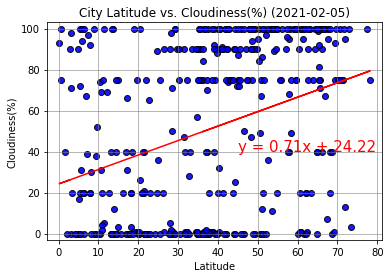

In [39]:
x_values = north_hem_df["Lat"]
y_values = north_hem_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black", alpha=0.90)

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(45,40), fontsize=15,color="red")

plt.xlim(x_values.min()-3, x_values.max()+3)
plt.ylim(y_values.min()-3, y_values.max()+3)

plt.title(f"City Latitude vs. Cloudiness(%) ({curr_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")

plt.grid(b=True, which='major', color='grey', linestyle='-', alpha=0.70)

plt.savefig('output_data/lat_v_cloud_N.png')

print(f'the r-value is: {rvalue**2}')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

the r-value is: 0.049373955167918336


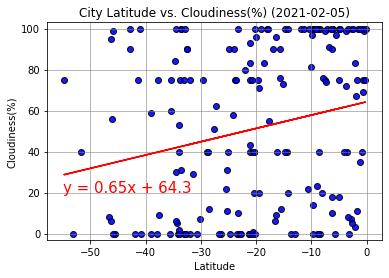

In [40]:
x_values = south_hem_df["Lat"]
y_values = south_hem_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black", alpha=0.90)

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(-55,20), fontsize=15,color="red")

plt.xlim(x_values.min()-3, x_values.max()+3)
plt.ylim(y_values.min()-3, y_values.max()+3)

plt.title(f"City Latitude vs. Cloudiness(%) ({curr_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")

plt.grid(b=True, which='major', color='grey', linestyle='-', alpha=0.70)

plt.savefig('output_data/lat_v_cloud_S.png')

print(f'the r-value is: {rvalue**2}')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

the r-value is: 0.0003991468914553655


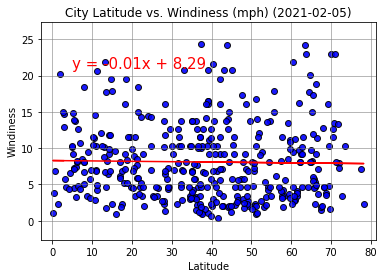

In [41]:
x_values = north_hem_df["Lat"]
y_values = north_hem_df["Wind"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black", alpha=0.90)

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(5,21), fontsize=15,color="red")

plt.xlim(x_values.min()-3, x_values.max()+3)
plt.ylim(y_values.min()-3, y_values.max()+3)

plt.title(f"City Latitude vs. Windiness (mph) ({curr_date})")
plt.xlabel("Latitude")
plt.ylabel("Windiness")

plt.grid(b=True, which='major', color='grey', linestyle='-', alpha=0.70)

plt.savefig('output_data/lat_v_wind_N.png')

print(f'the r-value is: {rvalue**2}')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

the r-value is: 0.04847884424598942


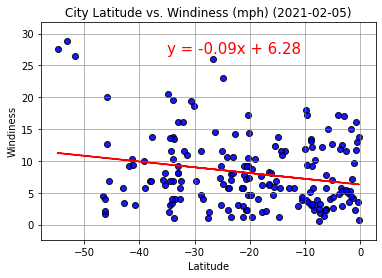

In [42]:
x_values = south_hem_df["Lat"]
y_values = south_hem_df["Wind"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black", alpha=0.90)

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(-35,27), fontsize=15,color="red")

plt.xlim(x_values.min()-3, x_values.max()+3)
plt.ylim(y_values.min()-3, y_values.max()+3)

plt.title(f"City Latitude vs. Windiness (mph) ({curr_date})")
plt.xlabel("Latitude")
plt.ylabel("Windiness")

plt.grid(b=True, which='major', color='grey', linestyle='-', alpha=0.70)

plt.savefig('output_data/lat_v_wind_S.png')

print(f'the r-value is: {rvalue**2}')